# Playing with Data Augmentations

In [95]:


def rotate(image):
    
    return tf.image.rot90(image, tf.random_uniform(shape=[], minval=0, maxval=4, 
                                               dtype=tf.int32))

def flip(image):
    
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    return image

def crop(image, range_start=0.8, range_end=1):
    
    image = tf.image.central_crop(image, central_fraction=random.uniform(range_start, range_end))
    image = tf.image.resize_images(image,tf.constant([512, 512]))
    return image

def translate(image,  x_max=75, y_max=75):
    
    return tf.contrib.image.translate(image, translations=[random.uniform(0, x_max), random.uniform(0, y_max)])

def augment_image(image):
                       
    # use image[:,:,None] for actual
        
    # dont forget about batch sizing when adjusting the image
    image = rotate(image)
    image = flip(image)
    image = translate(image)
    image = crop(image)
    
    return image


data/2/c98a368c-5493-47dc-8d7e-f3b76a857cc2.png
(512, 512)


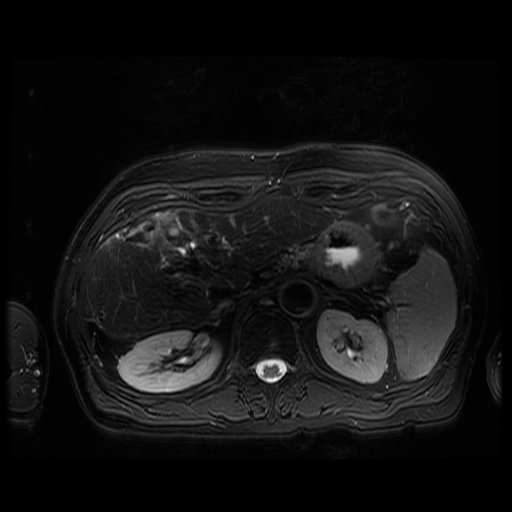

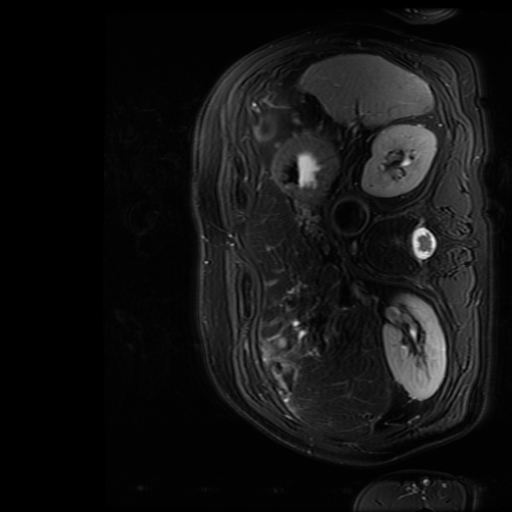

In [98]:
image_path = paths[2][1]

print(image_path)

im = imageio.imread(image_path)
print(im.shape)

display1 = Image.fromarray(im)
display(display1)

im_tensor = tf.convert_to_tensor(im)
im_tensor = tf.reshape(im_tensor, shape=[512,512,1])


im_tensor = augment_image(im_tensor)
im_augmented = tf.reshape(im_tensor, shape=[512,512])
im_augmented = im_augmented.numpy()


im_augmented = np.uint8(im_augmented)


display2 = Image.fromarray(im_augmented)
display(display2)
